In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

from IPython.display import Image


# Modeling Problems

## Non-Normal Residuals

- False linearity between $Y$ and $X$.
- Normality of residuals can be detected through:
  - Histogram of residuals
  - QQ plot
  - Tests for normality: Anderson–Darling, Shapiro–Wilks, Ryan–Joiner, Kolmogorov–Smirnov, ... tons of them

**Reminder:**  
Problems associated with non-normal residuals:
- $t$-test/$F$-test results unreliable
- Confidence intervals and prediction intervals may be wrong (i.e. overly confident or overly cautious)

But if $n \to \infty$, then asymptotically the distribution of $\hat{\beta}$ converges to a Normal distribution:

$$
\hat{\beta} \sim N(\beta, \operatorname{Var}(\hat{\beta}))
$$

---

## Ways to Deviate from Normality

- **Skewness**: measures asymmetry  
  - Population parameter: $\mathbb{E}\!\left[\left(\frac{Y-\mu}{\sigma}\right)^3\right]$  
  - Sample skewness: $\hat{\gamma}_1 = \frac{1}{n} \sum\limits_{i=1}^n\left(\dfrac{e_i}{\hat{\sigma}}\right)^3$

- **Kurtosis**: measures peakedness  
  - Population parameter: $\mathbb{E}\!\left[\left(\frac{Y-\mu}{\sigma}\right)^4\right]$  
  - Sample kurtosis:
    $\hat{\gamma}_2 = \frac{1}{n} \sum\limits_{i=1}^n\left(\dfrac{e_i}{\hat{\sigma}}\right)^4$
    

---

## Omnibus $\kappa^2$ Test for Normality
- Under $H_0$: distribution is Normal.  
- Under $H_a$: significant deviation from normality exists.  

$\kappa^2$ Statistic: combines skewness and kurtosis.  

$$\kappa^2 := Z^2_1(\hat{\gamma}_1) + Z^2_2(\hat{\gamma}_2)$$

where $Z_1$ and $Z_2$ denote respective z-scores. 

Under $H_0$, $\kappa^2\sim\chi^2_2.$

References: 

D’Agostino, R. B. (1971), “An omnibus test of normality for moderate and large sample size”, Biometrika, 58, 341-348.
D’Agostino, R. and Pearson, E. S. (1973), “Tests for departure from normality”, Biometrika, 60, 613-622.

Jarque–Bera (JB) test is similar:
- Under $H_0$: distribution is Normal.  
- Under $H_a$: significant deviation from normality exists.  

$$
JB := \frac{n-p}{6}(\hat{\gamma}_1^2 + \frac{1}{4}(\hat{\gamma}_2-3)^2)
$$

Under $H_0$, $JB\sim\chi^2_2.$

Reject $H_0$ if $JB$ is large $\;\;\Rightarrow$ significant deviation from Normality.

References:

Jarque, Carlos M.; Bera, Anil K. (1980). "Efficient tests for normality, homoscedasticity and serial independence of regression residuals". Economics Letters. 6 (3): 255–259. doi:10.1016/0165-1765(80)90024-5.

Hall, et al. (1995)

In [2]:
credit = pd.read_csv("../Data/Credit.csv")
credit['Income'] = pd.to_numeric(credit['Income'])

In [3]:
model =smf.ols('Balance ~ Income + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity', data=credit).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     757.8
Date:                Wed, 24 Sep 2025   Prob (F-statistic):          4.46e-248
Time:                        13:51:06   Log-Likelihood:                -2415.4
No. Observations:                 400   AIC:                             4853.
Df Residuals:                     389   BIC:                             4897.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -549.3140     35.085    -15.657      0.000    -618.293    -480.335
Gender[T.Female]         -10.7106     10.325     -1.037      0.300     -31.010       9.589
Student[T.Yes]           416.4376     17.336     24.021      0.000     382.353     450.522
Married[T.Yes]           -15.1096     10.728     -1.408      0.160     -36.202       5.983
Ethnicity[T.Asian]        21.7616     14.678      1.483      0.139      -7.096      50.619
Ethnicity[T.Caucasian]    10.6492     12.716      0.837      0.403     -14.351      35.649
Income                    -7.7746      0.244    -31.878      0.000      -8.254      -7.295
Rating                     3.9790      0.055     72.332      0.000       3.871       4.087
Cards                      3.9654      3.793      1.045      0.296      -3.492      11.422
Age                       -0.6416      0.306     -2.096      0.037      -1.243      -0.040
Education                 -0.3799      1.659     -0.229      0.819      -3.642       2.882
==============================================================================
Omnibus:                       15.651   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.769
Skew:                           0.490   Prob(JB):                     0.000228
Kurtosis:                       2.789   Cond. No.                     2.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(array([14., 46., 73., 82., 65., 50., 34., 17., 14.,  5.]),
 array([-204.86409664, -154.71692478, -104.56975291,  -54.42258105,
          -4.27540918,   45.87176268,   96.01893455,  146.16610641,
         196.31327828,  246.46045014,  296.60762201]),
 <BarContainer object of 10 artists>)

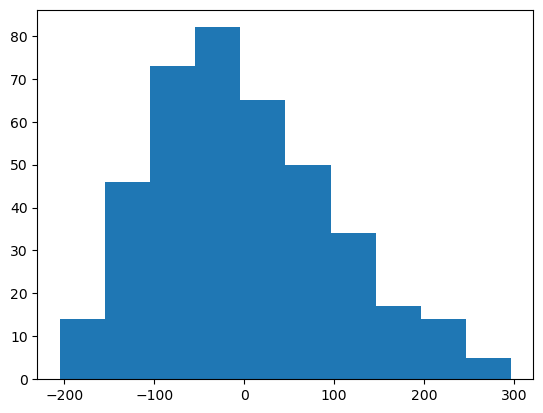

In [4]:
#histogram of residual to observe the shape/skewness
plt.hist(model.resid)

#### Slightly right skewed ... also visible in QQ plot:

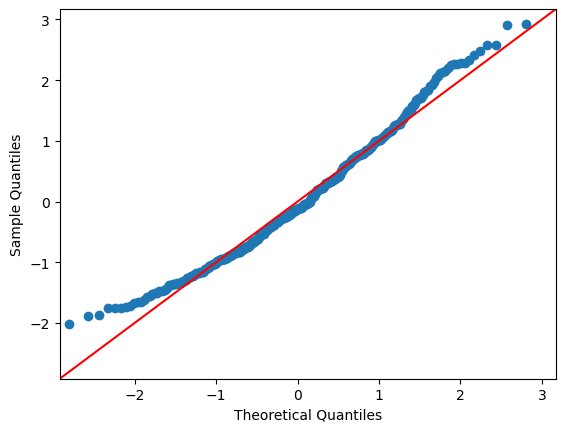

In [5]:
#QQ plot
sm.qqplot(model.resid/np.std(model.resid),  line = '45');

In [6]:
### If you need a test/pval to assess Normality, you can run the Kolmogorov-Smirnov test ... I never use this though lol.
### Most of the time it's enough to just look at the resids and make a visual argument. 

In [7]:
from scipy.stats import kstest
kstest(model.resid,'norm')

KstestResult(statistic=np.float64(0.5445911171192707), pvalue=np.float64(9.875941873462424e-112), statistic_location=np.float64(-3.3467104620751797), statistic_sign=np.int8(1))

In [8]:
credit['log_balance_1']=np.log(credit['Balance']+1) #add 1 to avoid log(0) 
model_1 =smf.ols('log_balance_1 ~ Income + Rating + Cards + Age + \
                    Education + Gender + Student + Married + Ethnicity',data=credit).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_balance_1   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     121.2
Date:                Wed, 24 Sep 2025   Prob (F-statistic):          6.57e-113
Time:                        13:51:06   Log-Likelihood:                -684.79
No. Observations:                 400   AIC:                             1392.
Df Residuals:                     389   BIC:                             1435.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.5554      0.464     -1.198      0.232      -1.467       0.356
Gender[T.Female]           0.0621      0.136      0.455      0.649      -0.206       0.330
Student[T.Yes]             1.8213      0.229      7.952      0.000       1.371       2.272
Married[T.Yes]             0.0793      0.142      0.560      0.576      -0.199       0.358
Ethnicity[T.Asian]        -0.1013      0.194     -0.523      0.602      -0.483       0.280
Ethnicity[T.Caucasian]     0.1867      0.168      1.111      0.267      -0.144       0.517
Income                    -0.0539      0.003    -16.743      0.000      -0.060      -0.048
Rating                     0.0226      0.001     31.134      0.000       0.021       0.024
Cards                     -0.0287      0.050     -0.573      0.567      -0.127       0.070
Age                       -0.0034      0.004     -0.841      0.401      -0.011       0.005
Education                 -0.0200      0.022     -0.912      0.362      -0.063       0.023
==============================================================================
Omnibus:                       67.817   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.355
Skew:                          -0.379   Prob(JB):                     5.14e-06
Kurtosis:                       2.059   Cond. No.                     2.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### After transformation: not so skewed anymore but not exactly Normal either... 


(array([ 1., 14., 31., 33., 59., 41., 47., 77., 75., 22.]),
 array([-3.68424435, -3.07964034, -2.47503634, -1.87043234, -1.26582834,
        -0.66122434, -0.05662034,  0.54798367,  1.15258767,  1.75719167,
         2.36179567]),
 <BarContainer object of 10 artists>)

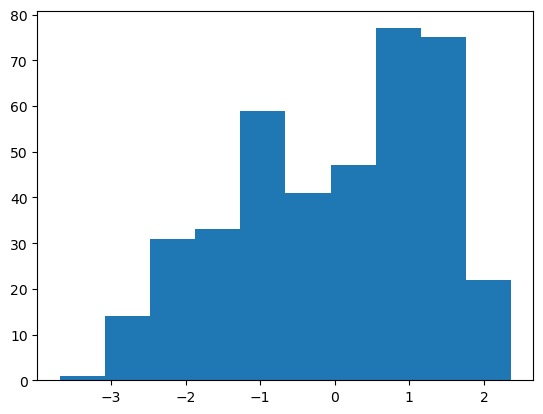

In [9]:
#histogram of residuals after transofrmation
plt.hist(model_1.resid)

### Light tailed QQ plot… So we are at least not anti-conservative!

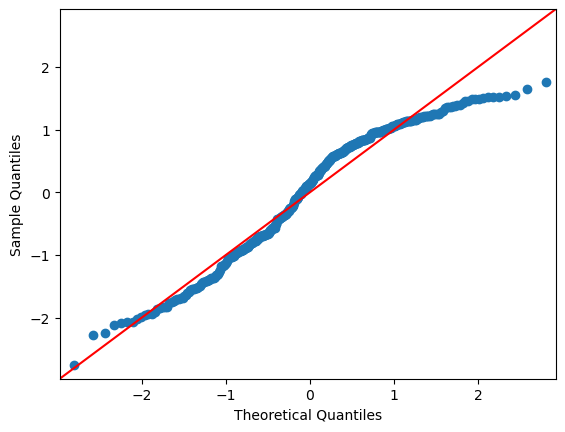

In [10]:
sm.qqplot(model_1.resid/np.std(model_1.resid),  line = '45');


---

## False Assumption of Linearity

When $Y$ and $X$ are not linearly related, we want to transform them until the relationship is linear.

**Ways to do this:**
- Transform $Y$  
- Transform $X$  

Note: transforming $Y$ may also affect heteroskedasticity.  

Heuristics for choosing transformations:
- $y^\alpha$
- $\log(y)$
- $\sqrt{y}$
- $\exp(y)$  


## Check for nonlinearity beween y and x

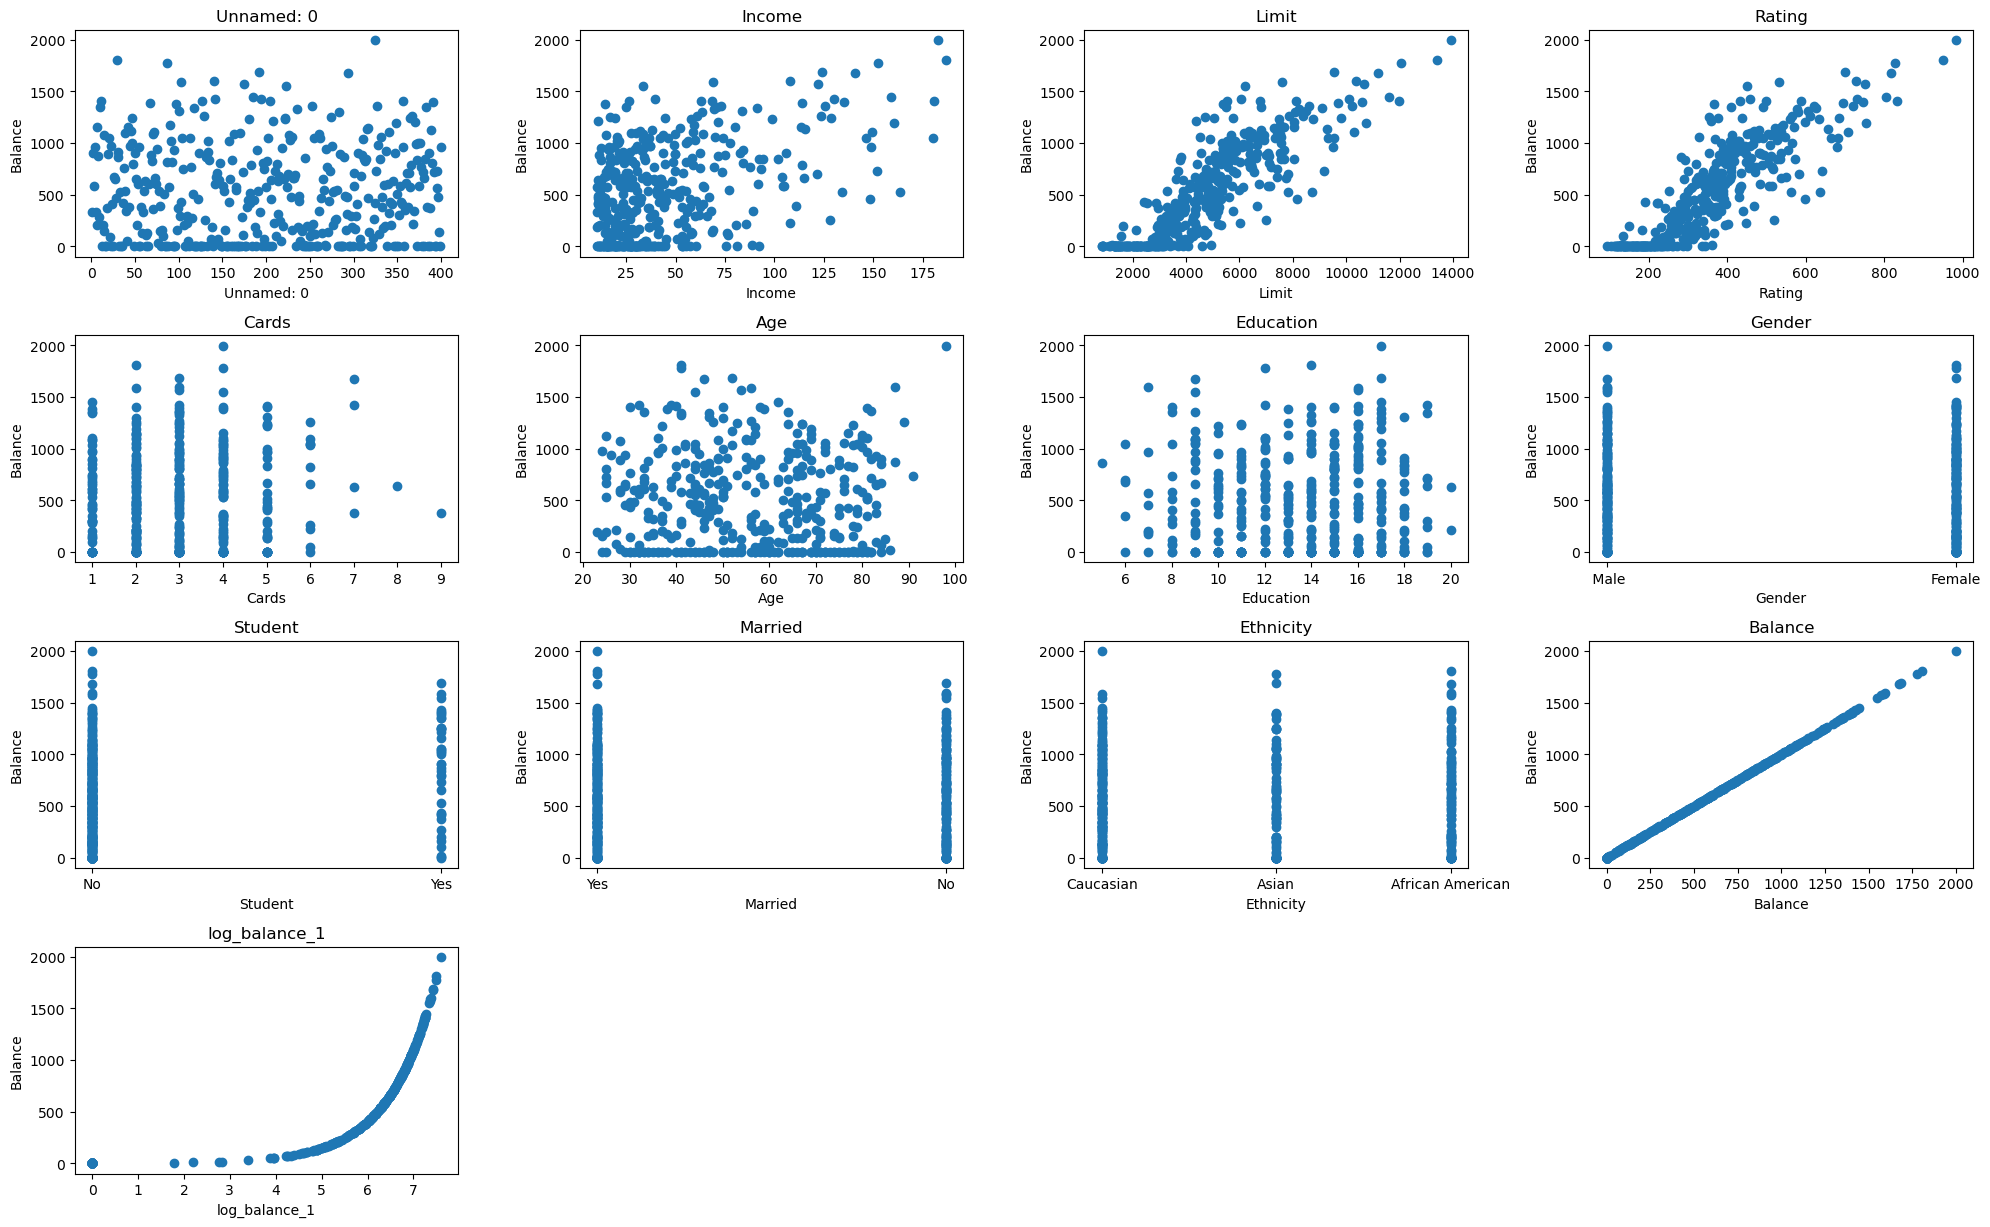

In [11]:
#pair-wise scatter plot between y and predictors
plt.figure(figsize=(20, 15))


# i: index
for i, col in enumerate(credit.columns):
    plt.subplot(5, 4, i+1)
    x = credit[col]
    y = credit['Balance']
    plt.plot(x, y, 'o')
    plt.tight_layout()

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Balance')
    # looks okay: maybe limit and rating?

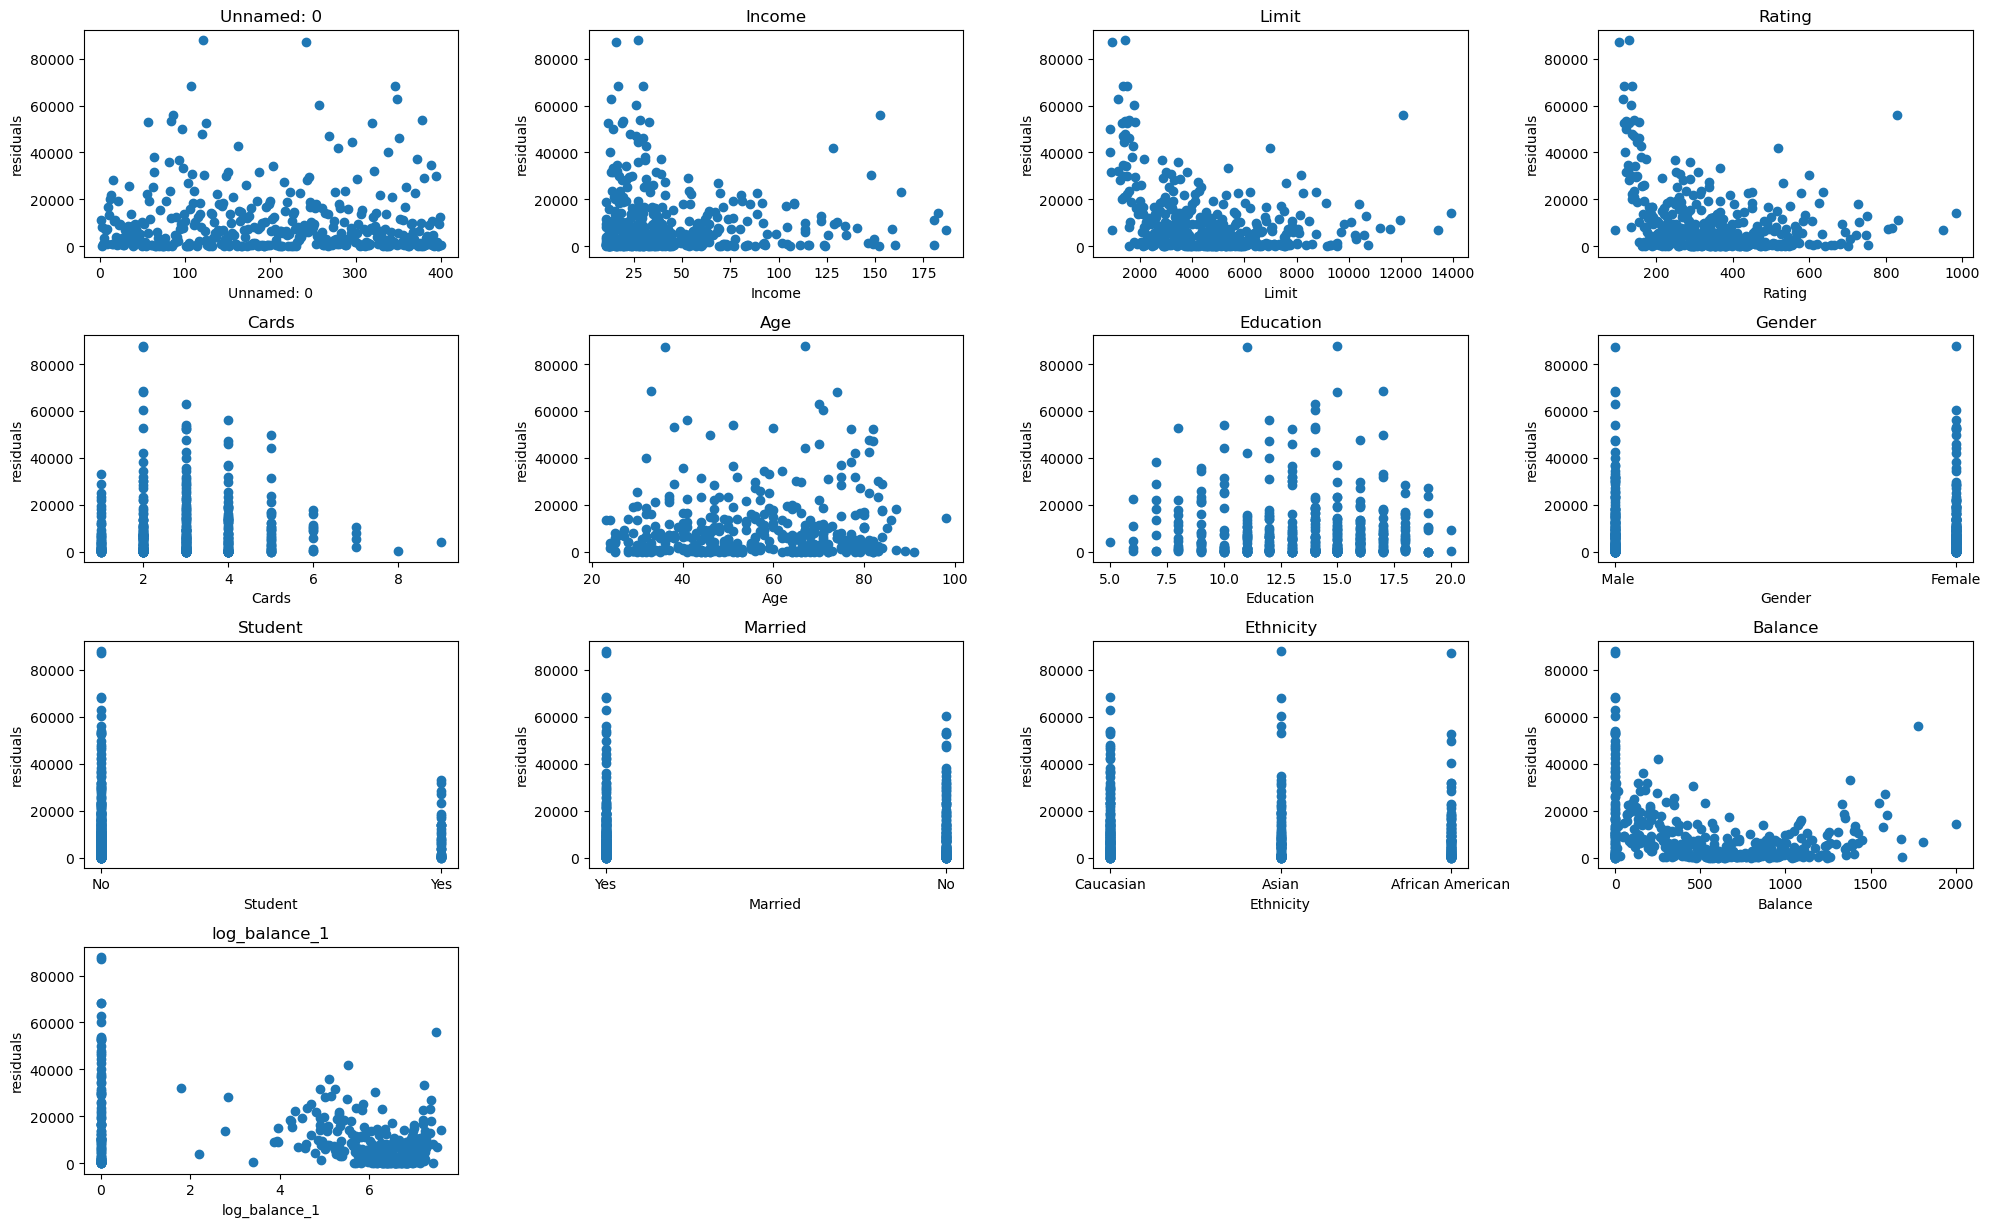

In [12]:
#residual plot might have suggestions too
#pair-wise scatter plot between residuals and predictors
plt.figure(figsize=(20, 15))


# i: index
for i, col in enumerate(credit.columns):
    plt.subplot(5, 4, i+1)
    x = credit[col]
    y = model.resid**2
    plt.plot(x, y, 'o')
    plt.tight_layout()

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('residuals')


In [13]:
credit['log_rating']=np.log(credit['Rating'])
credit['log_income']=np.log(credit['Income'])

In [14]:
model_2 =smf.ols('log_balance_1~log_income + log_rating + Cards + Age + Education \
                    + Gender + Student + Married + Ethnicity', data=credit).fit()
model_2.summary()
# with the same number of predictors, R^2 improved

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_balance_1   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     191.7
Date:                Wed, 24 Sep 2025   Prob (F-statistic):          1.36e-143
Time:                        13:51:07   Log-Likelihood:                -611.76
No. Observations:                 400   AIC:                             1246.
Df Residuals:                     389   BIC:                             1289.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -27.7589      0.845    -32.867      0.000     -29.419     -26.098
Gender[T.Female]           0.0670      0.114      0.590      0.556      -0.156       0.290
Student[T.Yes]             1.7858      0.191      9.362      0.000       1.411       2.161
Married[T.Yes]             0.0416      0.118      0.353      0.724      -0.190       0.274
Ethnicity[T.Asian]        -0.0680      0.162     -0.421      0.674      -0.386       0.250
Ethnicity[T.Caucasian]     0.2000      0.140      1.429      0.154      -0.075       0.475
log_income                -1.7383      0.112    -15.509      0.000      -1.959      -1.518
log_rating                 6.7513      0.169     39.854      0.000       6.418       7.084
Cards                     -0.0337      0.042     -0.805      0.421      -0.116       0.049
Age                       -0.0025      0.003     -0.741      0.459      -0.009       0.004
Education                 -0.0219      0.018     -1.201      0.231      -0.058       0.014
==============================================================================
Omnibus:                       37.355   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.152
Skew:                          -0.779   Prob(JB):                     1.57e-10
Kurtosis:                       3.528   Cond. No.                         911.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#another example 
df = pd.read_csv('../Data/kc_house_data.csv')
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
799,6838800140,20150224T000000,1100000.0,4,3.50,4270,40097,1.0,0,0,...,12,4270.0,0,1993,0,98077,47.7354,-122.078,3510,36149
19057,7568700215,20150312T000000,399500.0,4,1.50,1660,6617,1.0,0,0,...,7,1660.0,0,1947,0,98155,47.7390,-122.323,950,7440
11351,6031400071,20150114T000000,270000.0,4,2.50,1670,8056,1.0,0,0,...,7,1170.0,500,1961,0,98168,47.4884,-122.319,1360,8056
6128,2623069069,20140911T000000,775000.0,3,2.50,2620,241200,1.5,0,0,...,9,2620.0,0,1998,0,98027,47.4574,-122.010,2620,172933
8153,1424100100,20140610T000000,183000.0,3,1.75,1330,9200,1.0,0,0,...,7,1330.0,0,1973,0,98092,47.2916,-122.185,1590,9200


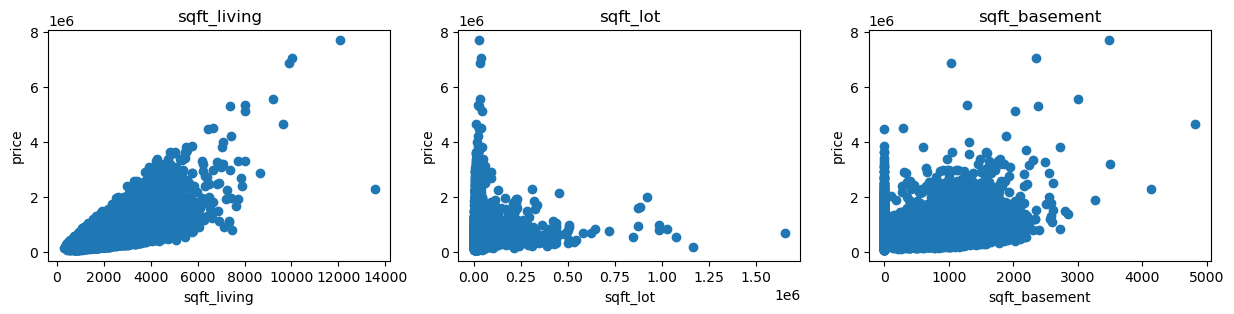

In [16]:
predictor=df[['sqft_living', 'sqft_lot','sqft_basement' ]]

plt.figure(figsize=(15, 3))


for i, col in enumerate(predictor.columns):
    plt.subplot(1, 3, i+1)
    x = predictor[col]
    y = df.price
    plt.plot(x, y, 'o')

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')

In [17]:
df['log_price'] = np.log(df['price'])


In [18]:
df['log_sqft_living'] = np.log(df['sqft_living'])


In [19]:
df['log_sqft_lot'] = np.log(df['sqft_lot'])


In [20]:
df['log_sqft_basement'] = np.log(df['sqft_basement']+1) #+1 to avoid log(0)

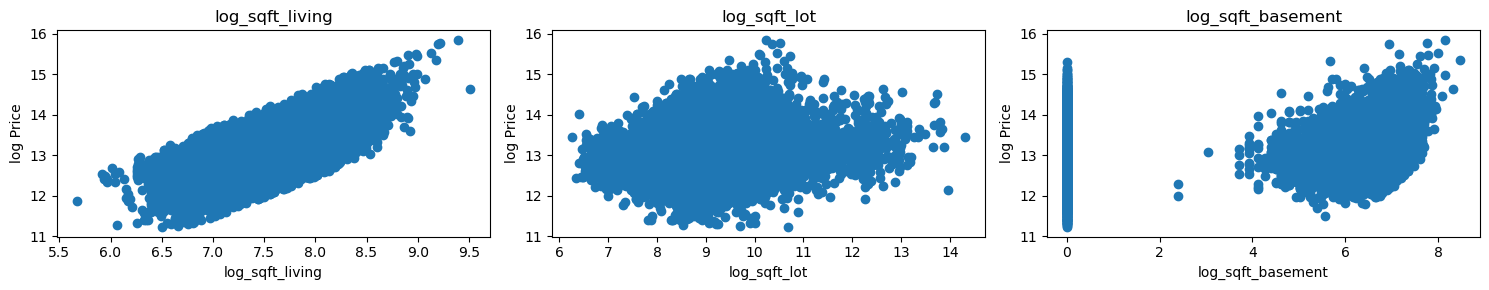

In [21]:
predictor=df[['log_sqft_living', 'log_sqft_lot','log_sqft_basement' ]]

plt.figure(figsize=(15, 3))

for i, col in enumerate(predictor.columns):
    plt.subplot(1, 3, i+1)
    x = predictor[col]
    y = df.log_price
    plt.plot(x, y, 'o')
    plt.tight_layout()


    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('log Price')

## Interaction Effects

Sometimes we observe an **interaction effect** between two or more predictors. An interaction means that the effect of one predictor on the outcome depends on the value of the other predictor. In other words, the predictors do not just add their influences independently; instead, they combine in a way that modifies each other’s effect.

Without interaction:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \varepsilon
$$

With interaction:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 (X_1 \times X_2) + \varepsilon
$$

The term $\beta_3 (X_1 \times X_2)$ means the slope for $X_1$ changes depending on the value of $X_2$. For instance... two individual pieces of clothes could have positive effects on a look individually, but together could have a mismatch effect.


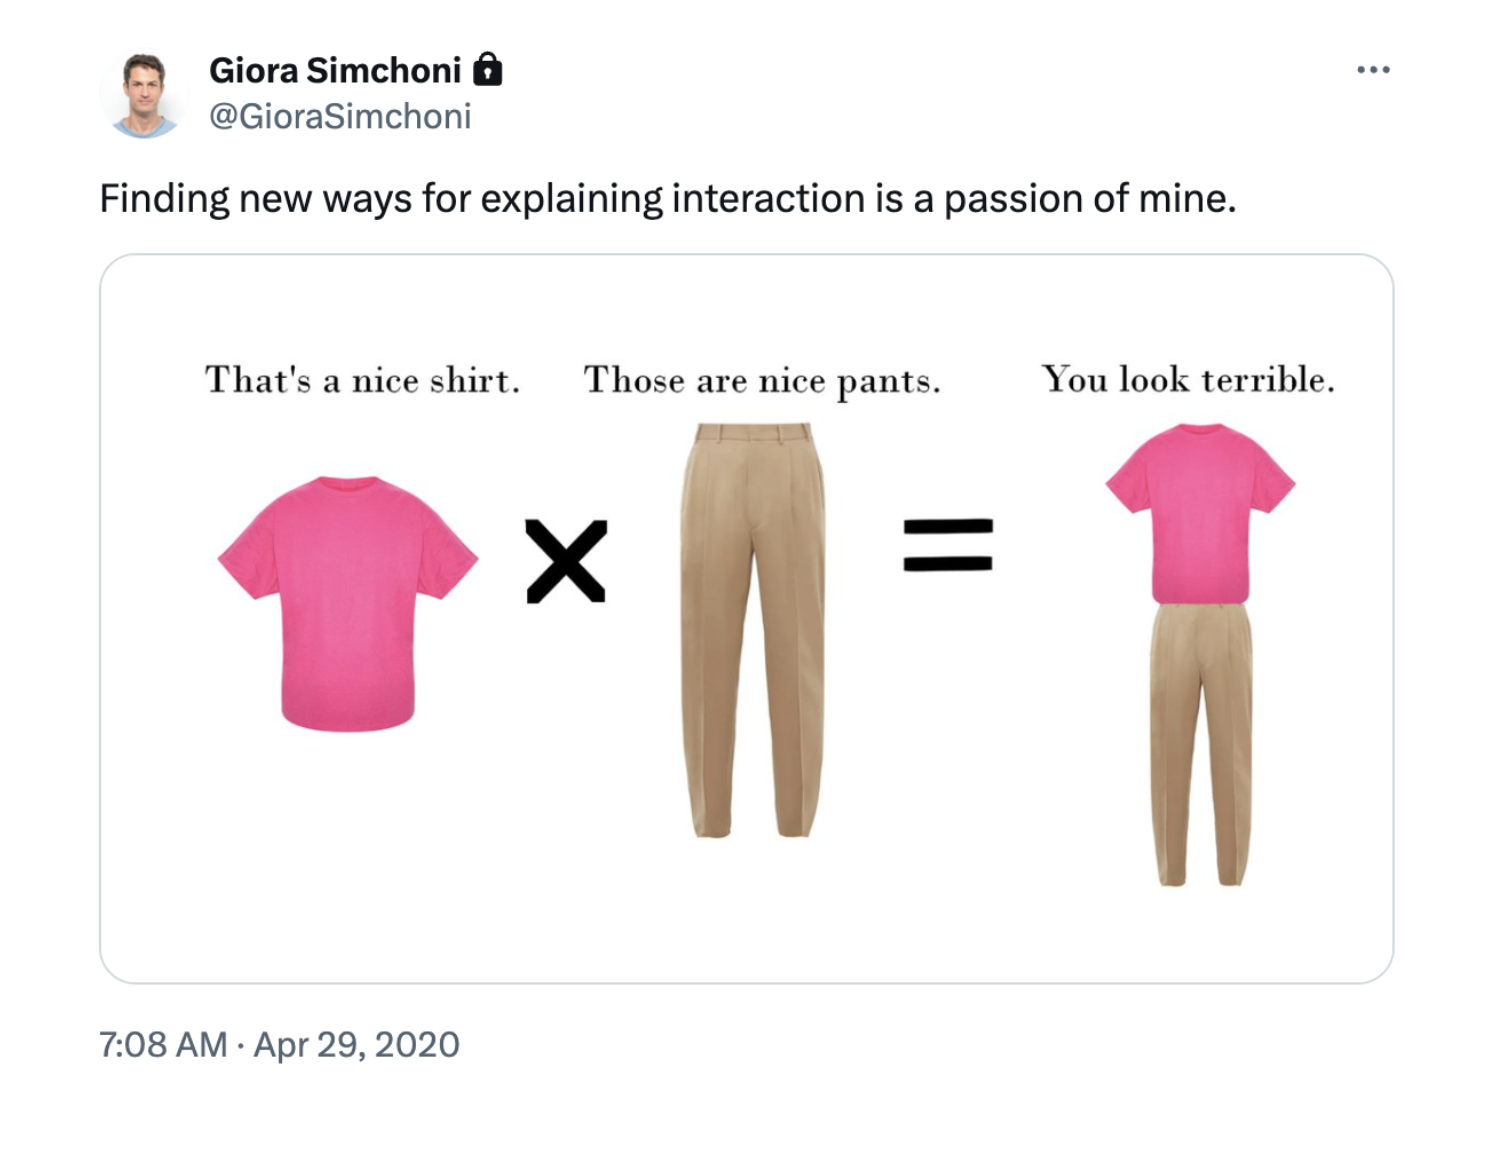

In [22]:
Image("./interaction.png")

In this example, we would have a positive $\hat{\beta}_1$ and $\hat{\beta}_2$ but a negative $\hat{\beta}_3$ because of the clashing/negative interaction. 


## Nonparametric Approaches

When transformations do not suffice, nonparametric methods can be used to capture nonlinear relationships.  
Examples include smoothing and kernel regression... Future material in ML1/ML2.

